<a href="https://colab.research.google.com/github/samuelrajgarikimukku/Customer-Churn-Analysis-Prediction/blob/main/Churn_Prediction_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import joblib

In [5]:
import pandas as pd

file_path = "/content/prediction_data.xlsx"

# Load each sheet into a DataFrame
churn_df = pd.read_excel(file_path, sheet_name='churnview')
join_df = pd.read_excel(file_path, sheet_name='joindataview')

print("Churn Data (head):")
print(churn_df.head())


print("\nJoin Data (head):")
print(join_df.head())

Churn Data (head):
  Customer_ID  Gender  Age Married           State  Number_of_Referrals  \
0   11098-MAD  Female   30     Yes  Madhya Pradesh                    0   
1   11114-PUN    Male   51      No          Punjab                    5   
2   11167-WES  Female   43     Yes     West Bengal                    3   
3   11179-MAH    Male   35      No     Maharashtra                   10   
4   11180-TAM    Male   75     Yes      Tamil Nadu                   12   

   Tenure_in_Months Value_Deal Phone_Service Multiple_Lines  ...  \
0                31     Deal 1           Yes             No  ...   
1                 9     Deal 5           Yes             No  ...   
2                28     Deal 1           Yes            Yes  ...   
3                12        NaN           Yes             No  ...   
4                27     Deal 2           Yes             No  ...   

    Payment_Method Monthly_Charge Total_Charges Total_Refunds  \
0  Bank Withdrawal          95.10       6683.40         

In [6]:
#Step 2: Preprocessing Churn Data

# Drop columns not needed for training
churn_df = churn_df.drop(['Customer_ID', 'Churn_Category', 'Churn_Reason'], axis=1)

# Columns to encode
columns_to_encode = [
    'Gender', 'Married', 'State', 'Value_Deal', 'Phone_Service', 'Multiple_Lines',
    'Internet_Service', 'Internet_Type', 'Online_Security', 'Online_Backup',
    'Device_Protection_Plan', 'Premium_Support', 'Streaming_TV', 'Streaming_Movies',
    'Streaming_Music', 'Unlimited_Data', 'Contract', 'Paperless_Billing',
    'Payment_Method'
]

# Encode categorical variables
label_encoders = {}
for column in columns_to_encode:
    label_encoders[column] = LabelEncoder()
    churn_df[column] = label_encoders[column].fit_transform(churn_df[column])

# Encode target variable
churn_df['Customer_Status'] = churn_df['Customer_Status'].map({'Stayed': 0, 'Churned': 1})

# Split into features and target
X = churn_df.drop('Customer_Status', axis=1)
y = churn_df['Customer_Status']

In [7]:
# Step 3: Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Step 4: Train Random Forest

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Confusion Matrix:
 [[657  51]
 [118 174]]

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.93      0.89       708
           1       0.77      0.60      0.67       292

    accuracy                           0.83      1000
   macro avg       0.81      0.76      0.78      1000
weighted avg       0.83      0.83      0.82      1000



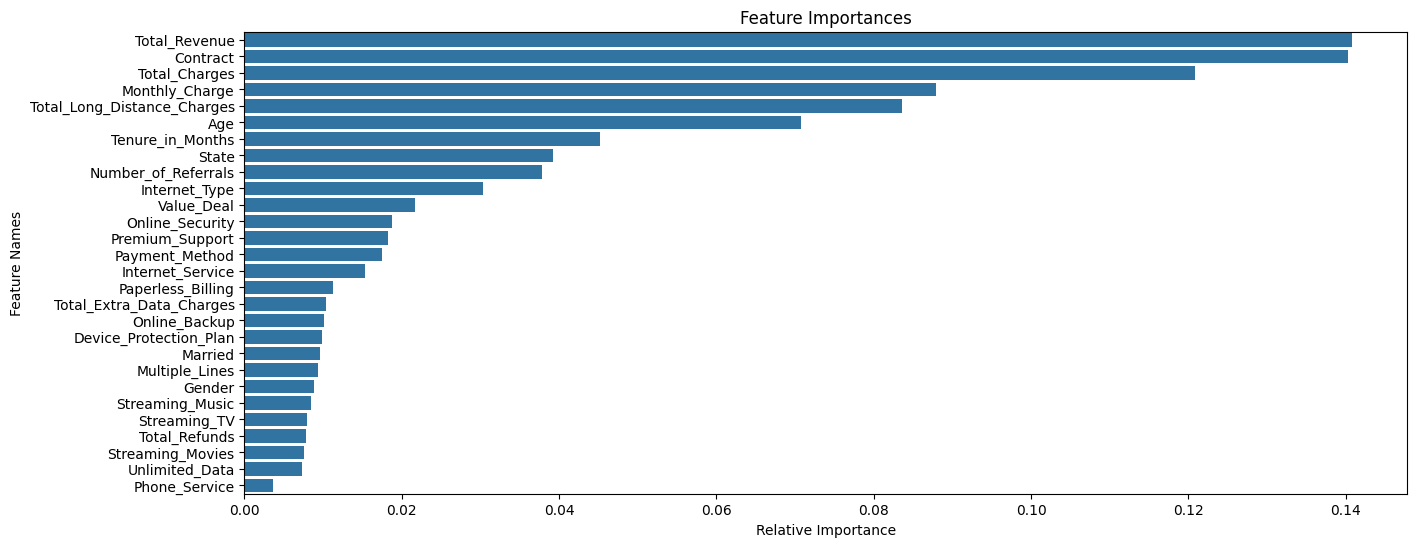

In [9]:
# Step 5: Evaluate Model

y_pred = rf_model.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Feature Importance
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(15, 6))
sns.barplot(x=importances[indices], y=X.columns[indices])
plt.title('Feature Importances')
plt.xlabel('Relative Importance')
plt.ylabel('Feature Names')
plt.show()


In [10]:
# Step 6: Use Model on Join Data
# -----------------------------

# Copy original join data (to keep Customer_ID etc.)
original_join_df = join_df.copy()

# Drop unused columns
join_data = join_df.drop(['Customer_ID', 'Customer_Status', 'Churn_Category', 'Churn_Reason'], axis=1)

# Encode categorical columns using SAME encoders
for column in join_data.select_dtypes(include=['object']).columns:
    join_data[column] = label_encoders[column].transform(join_data[column])

# Predictions
new_predictions = rf_model.predict(join_data)

# Add predictions to original data
original_join_df['Customer_Status_Predicted'] = new_predictions

# Filter only predicted churners
predicted_churners = original_join_df[original_join_df['Customer_Status_Predicted'] == 1]

In [12]:
from google.colab import drive
drive.mount('/content/drive')

# Then save inside your Drive
predicted_churners.to_csv("/content/drive/MyDrive/Predictions.csv", index=False)

Mounted at /content/drive
